 # **Project Synopsis: Retail Customer Behavior Analysis**


---


This project delves into the fascinating world of retail customer behavior through data analytics. By leveraging the power of Python and focusing on exploratory data analysis (EDA), we aim to extract meaningful insights from a retail transaction dataset. This will provide a deeper understanding of how customers behave and what drives their purchasing decisions.

**Delving Deeper: What We Aim to Achieve**

•	Understanding Customer Trends: We'll analyze the dataset to uncover patterns and trends in customer behavior. This includes exploring factors like demographics, product preferences, and spending habits.

•	Identifying Customer Segments: By analyzing different customer characteristics, we'll identify distinct segments with unique purchasing behaviors. This allows for targeted marketing strategies and product recommendations.

•	Relationships Between Variables: We'll explore how various factors, such as age, gender, and product category, influence purchase decisions. This knowledge can be used to optimize product placement, marketing campaigns, and overall customer experience.

•	Actionable Insights: Ultimately, the project aims to translate the discovered insights into practical recommendations. This might involve improving customer retention strategies, tailoring marketing campaigns, or optimizing product offerings.

**Dataset Description:**

The dataset used in this project contains information about retail transactions. Each row represents a single transaction, with the following columns:

•	Transaction ID: A unique identifier for each transaction, used for tracking and referencing specific purchases.

•	Date: The date the transaction occurred. This is crucial for cohort creation and time-series analysis.

•	Customer ID: A unique identifier for each customer, enabling customer-centric analysis and cohort assignment.

•	Gender: The customer's gender (Male/Female), allowing for gender-based analysis of purchasing patterns within cohorts.

•	Age: The customer's age, facilitating age-based segmentation and analysis of age-related purchasing preferences within cohorts.

•	Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), enabling analysis of product popularity and category-specific trends within cohorts.

•	Quantity: The number of units of the product purchased in the transaction. This contributes to understanding purchase volumes within cohorts.

•	Price per Unit: The price of a single unit of the product. Used with quantity to calculate total transaction value within cohorts.

•	Total Amount: The total monetary value of the transaction (Quantity * Price per Unit). This provides a measure of the financial impact of each purchase within cohorts.

**Questions to Explore:**

How does customer age and gender influence their purchasing behavior?

Are there discernible patterns in sales across different time periods?

Which product categories hold the highest appeal among customers?

What are the relationships between age, spending, and product preferences?

How do customers adapt their shopping habits during seasonal trends?

Are there distinct purchasing behaviors based on the number of items bought per transaction?

What insights can be gleaned from the distribution of product prices within each category?


In [35]:
import pandas as pd

df = pd.read_csv('retail.csv')
print(df.head())
print(df.tail())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   

In [10]:
# Data Cleaning and Preprocessing
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce') # Ensure correct data type for calculations
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df.dropna(inplace=True) # Remove rows with missing values after type conversion

In [11]:
missing_values = data.isnull().sum()
print(missing_values)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [13]:
data_types = data.dtypes
print(data_types)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [15]:
# Display the descriptive statistics of the dataset
columns_to_include = ['Quantity', 'Price per Unit', 'Total Amount', 'Age'] # Include only these columns
numeric_df_include = df[columns_to_include]
descriptive_stats_include = numeric_df_include.describe()
print("\nDescriptive Statistics (Including only specified columns):\n", descriptive_stats_include)


Descriptive Statistics (Including only specified columns):
           Quantity  Price per Unit  Total Amount         Age
count  1000.000000     1000.000000   1000.000000  1000.00000
mean      2.514000      179.890000    456.000000    41.39200
std       1.132734      189.681356    559.997632    13.68143
min       1.000000       25.000000     25.000000    18.00000
25%       1.000000       30.000000     60.000000    29.00000
50%       3.000000       50.000000    135.000000    42.00000
75%       4.000000      300.000000    900.000000    53.00000
max       4.000000      500.000000   2000.000000    64.00000


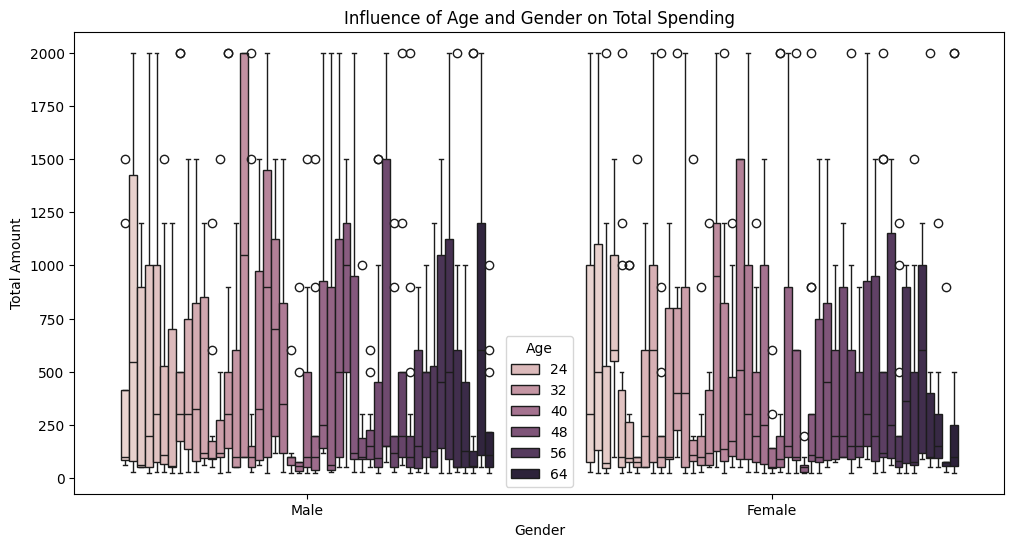

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Influence of Age and Gender on Purchasing Behavior
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Total Amount', hue='Age', data=df)
plt.title('Influence of Age and Gender on Total Spending')
plt.show()

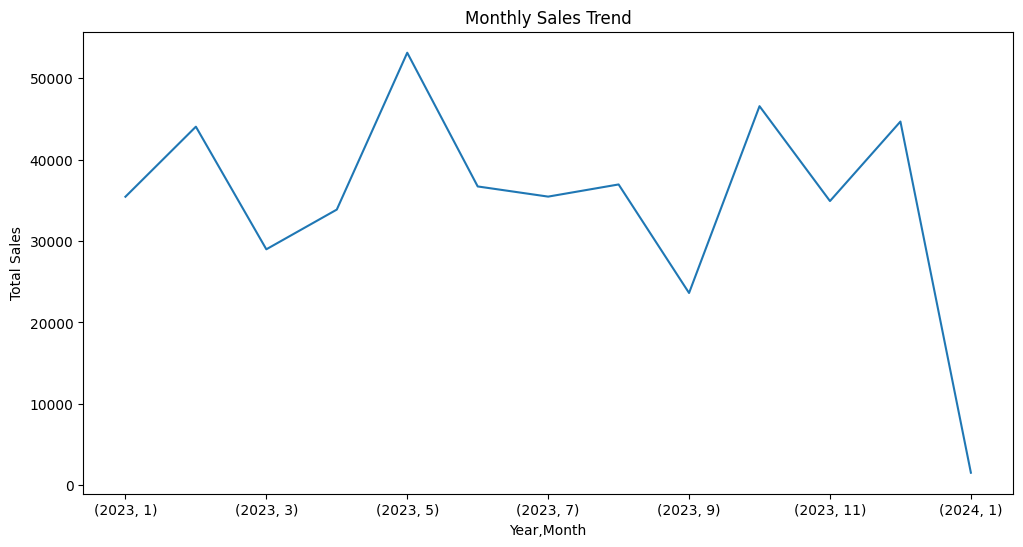

In [17]:
# 2. Sales Patterns Across Time Periods
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
monthly_sales = df.groupby(['Year','Month'])['Total Amount'].sum()
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.show()

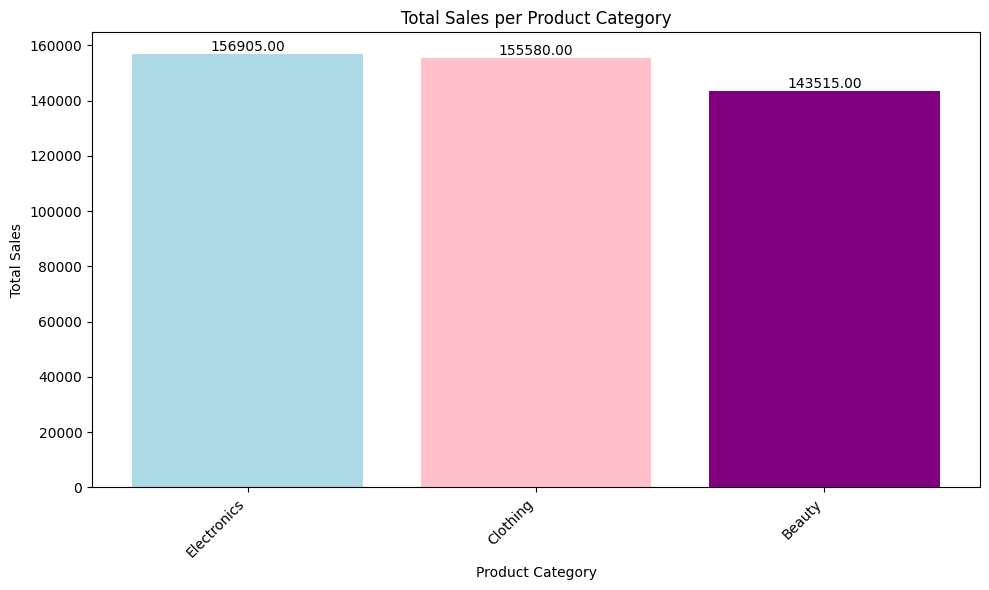

In [8]:
# 3. Most Appealing Product Categories
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Create a bar chart with custom colors
colors = ['lightblue', 'pink', 'purple']  # Adjust colors as needed

plt.figure(figsize=(10, 6))
bars = plt.bar(category_sales.index, category_sales.values, color=colors)  # Set custom colors

# Add total sales labels above each bar
for bar, label in zip(bars, category_sales.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f"{label:.2f}", ha='center', va='bottom', fontsize=10)  # Adjust label formatting as needed

plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for readability
plt.tight_layout()
plt.show()

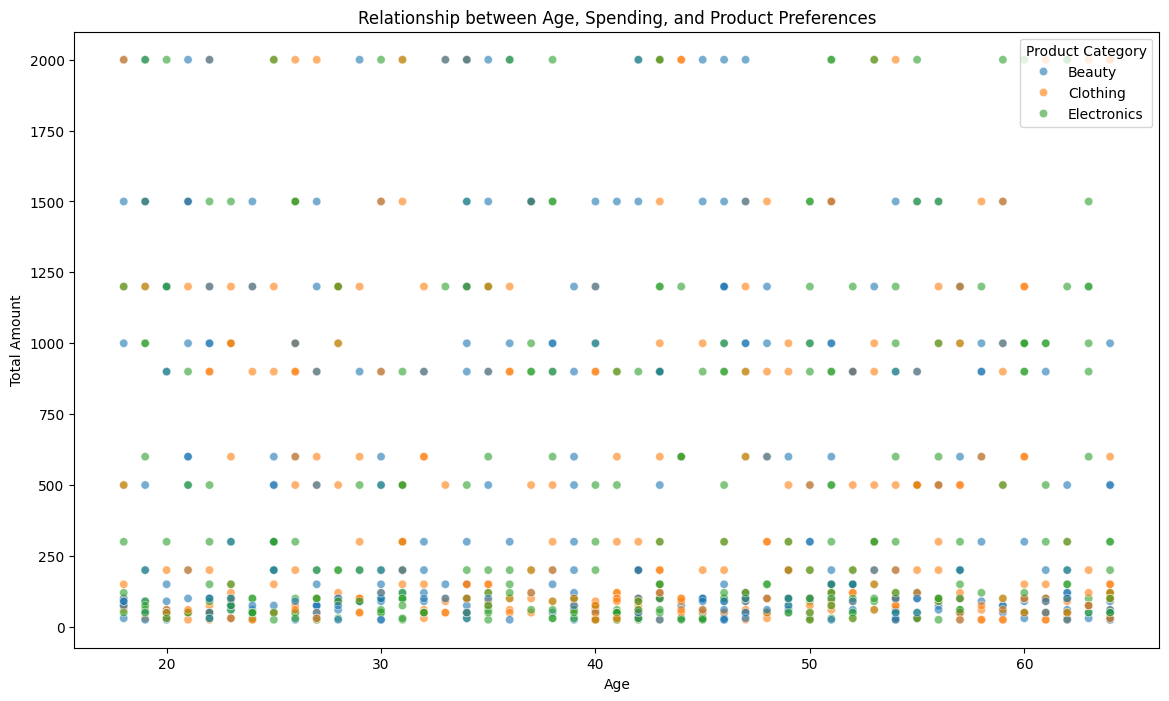

In [19]:
# 4. Relationships Between Age, Spending, and Product Preferences
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Age', y='Total Amount', hue='Product Category', data=df, alpha=0.6)
plt.title('Relationship between Age, Spending, and Product Preferences')
plt.show()


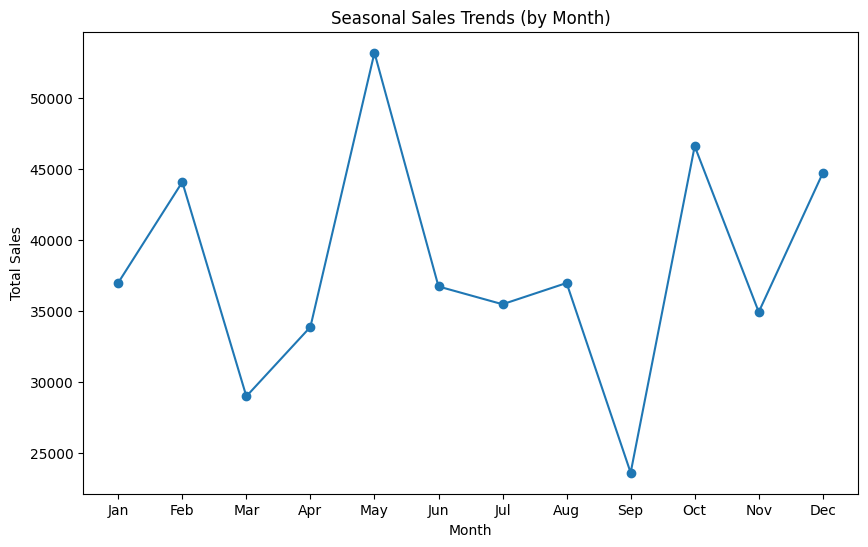

In [20]:
# 5. Shopping Habits During Seasonal Trends (Example using month as proxy for season)
seasonal_sales = df.groupby('Month')['Total Amount'].sum()
seasonal_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Seasonal Sales Trends (by Month)')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [37]:
df['Total Amount'].dtype

dtype('int64')

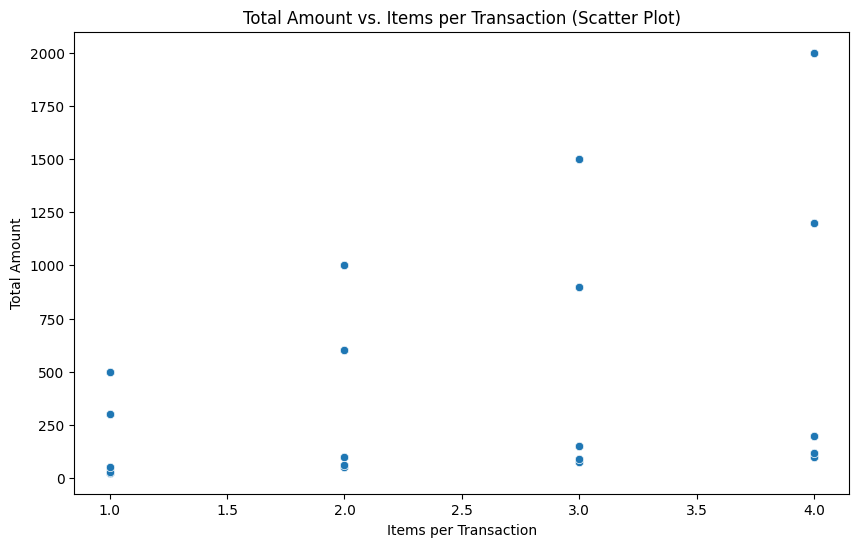

In [6]:
# 6. Purchasing Behaviors Based on Number of Items Bought
df['Items per Transaction'] = df.groupby('Transaction ID')['Quantity'].transform('sum')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Items per Transaction', y='Total Amount', data=df)
plt.title('Total Amount vs. Items per Transaction (Scatter Plot)')
plt.xlabel('Items per Transaction')
plt.ylabel('Total Amount')
plt.show()

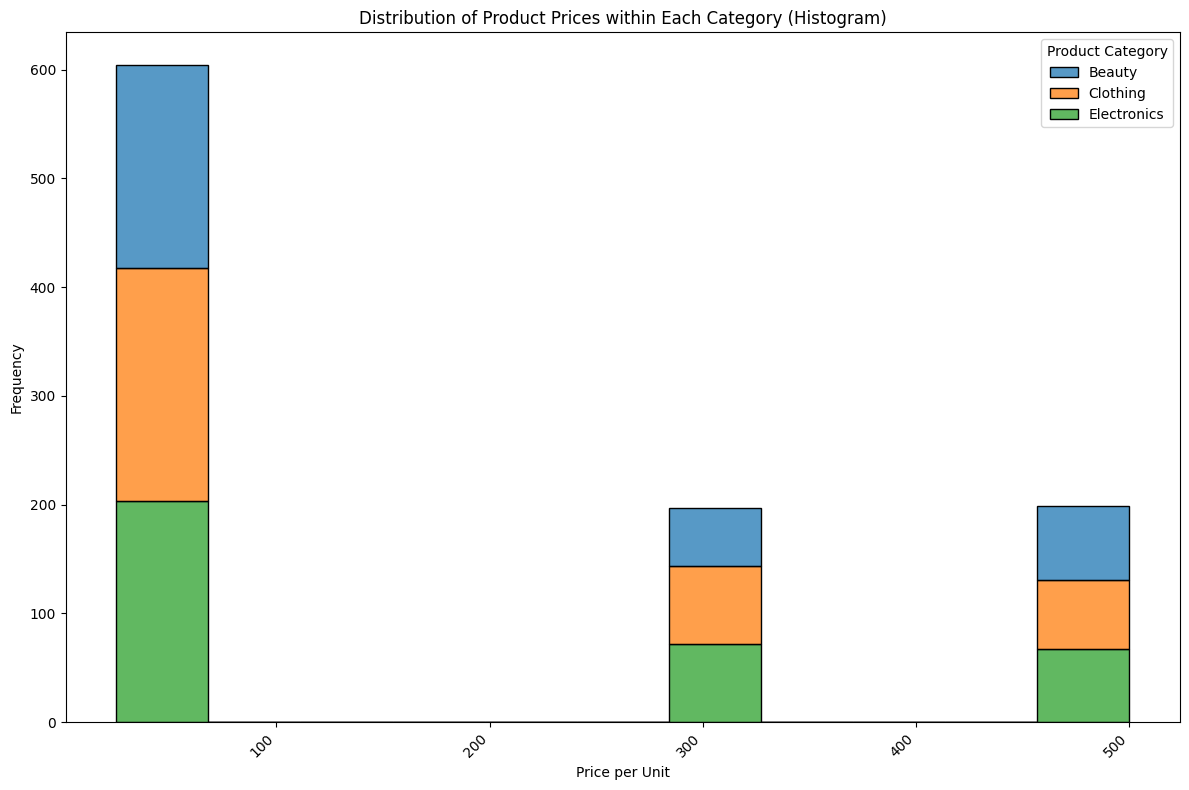

In [42]:
# 7. Distribution of Product Prices Within Each Category
plt.figure(figsize=(12, 8))
sns.histplot(x='Price per Unit', hue='Product Category', data=df, multiple='stack')  # Stacked bars for categories
plt.title('Distribution of Product Prices within Each Category (Histogram)')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

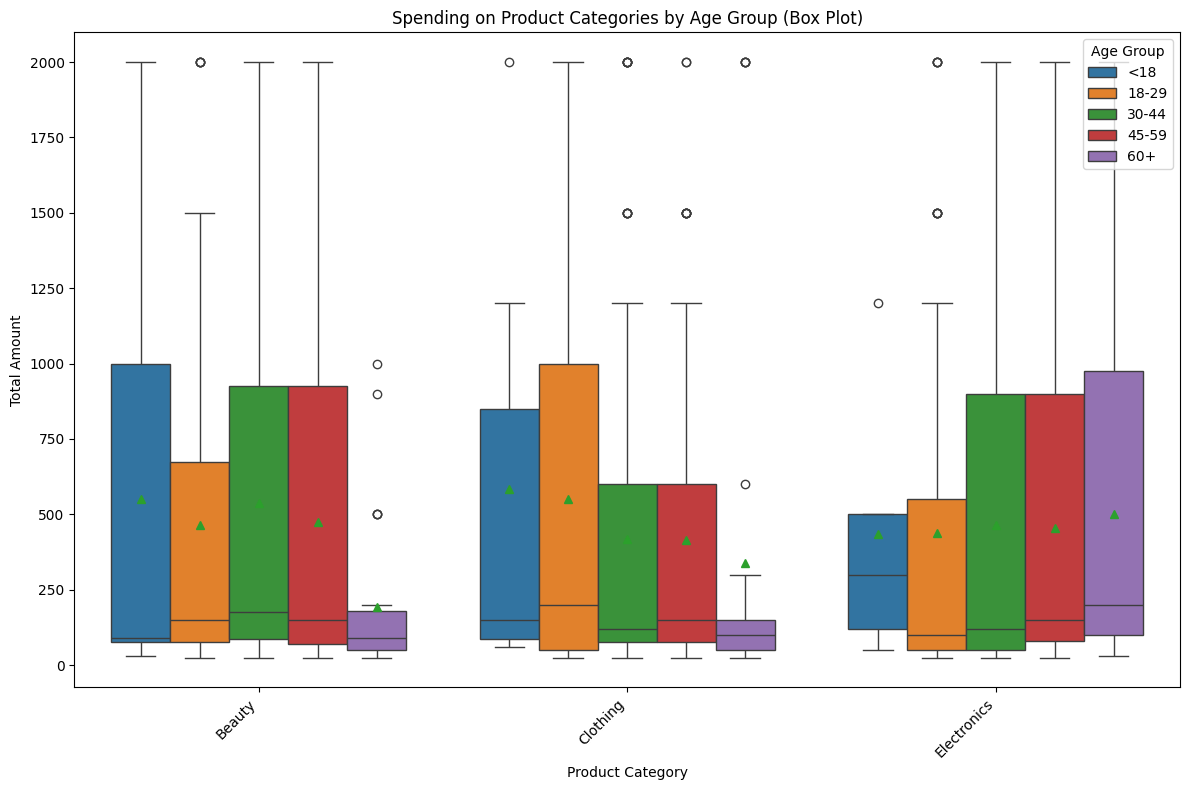

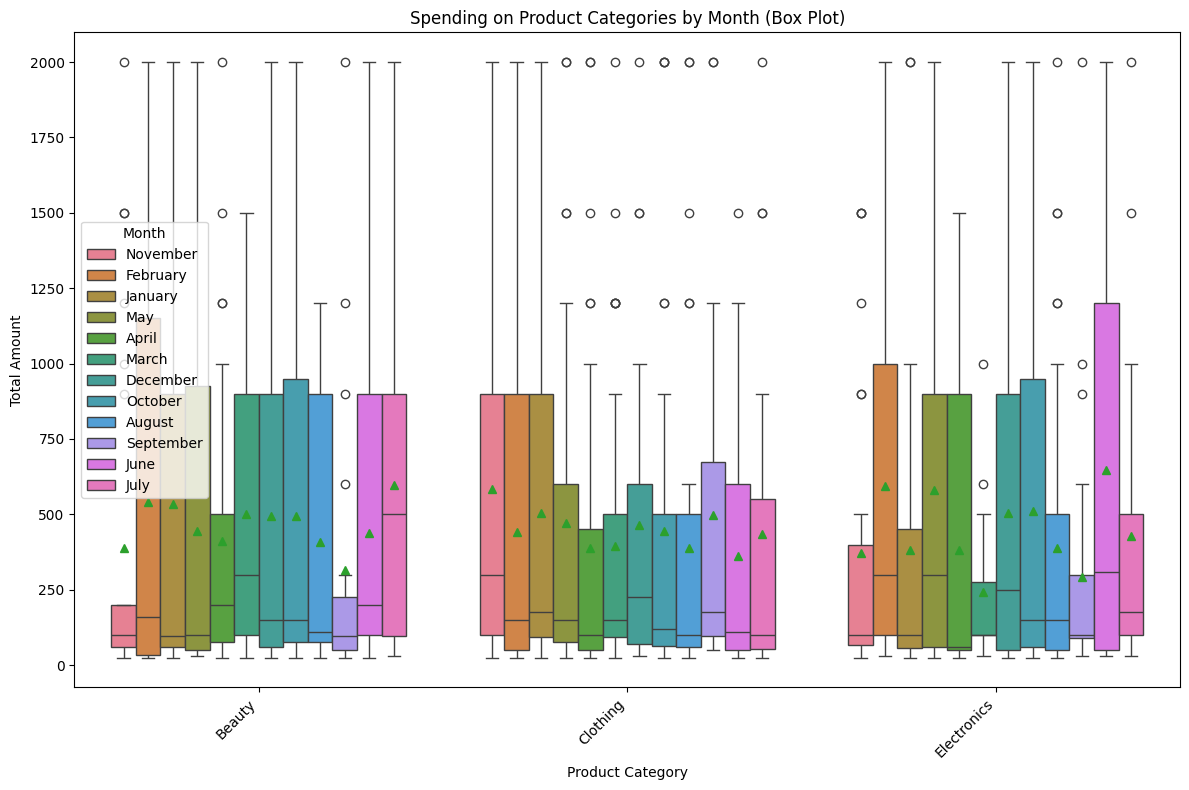

In [5]:
# Define spending categories
df['Spending Category'] = pd.cut(df['Total Amount'], bins=[0, 50, 100, 500, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

# Spending on Product Categories by Age Group (Boxplot)
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, float('inf')], labels=['<18', '18-29', '30-44', '45-59', '60+'])

plt.figure(figsize=(12, 8))
sns.boxplot(x="Product Category", y="Total Amount", hue="Age Group", data=df, showmeans=True)
plt.title('Spending on Product Categories by Age Group (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Spending on Product Categories by Month (Boxplot)
df['Month'] = df['Date'].dt.month_name()

plt.figure(figsize=(12, 8))
sns.boxplot(x="Product Category", y="Total Amount", hue="Month", data=df, showmeans=True)
plt.title('Spending on Product Categories by Month (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()